<a href="https://colab.research.google.com/github/amzad-786githumb/Data_Analytics-R/blob/main/Data_Analysis_Case_Study_Changes_in_Fine_Particle_Air_Pollution_in_the_U_S.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Loading and Processing the Raw Data

In [1]:
library(readr)

In [2]:
pm0 <- read_delim("/content/RD_501_88101_1999-0.txt",
delim = "|",
comment = "#",
col_names = FALSE,
na = "")

Rows: 117421 Columns: 28
── Column specification ────────────────────────────────────────────────────────
Delimiter: "|"
chr   (7): X1, X2, X3, X4, X5, X14, X17
dbl   (8): X6, X7, X8, X9, X10, X11, X13, X15
lgl  (12): X16, X18, X19, X20, X21, X22, X23, X24, X25, X26, X27, X28
time  (1): X12

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
dim(pm0)

[1] 117421     28

In [4]:
head(pm0[, 1:13])

X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<time>,<dbl>
RD,I,01,027,0001,88101,1,7,105,120,19990103,00:00:00,NA
RD,I,01,027,0001,88101,1,7,105,120,19990106,00:00:00,NA
RD,I,01,027,0001,88101,1,7,105,120,19990109,00:00:00,NA
RD,I,01,027,0001,88101,1,7,105,120,19990112,00:00:00,8.841
RD,I,01,027,0001,88101,1,7,105,120,19990115,00:00:00,14.920
RD,I,01,027,0001,88101,1,7,105,120,19990118,00:00:00,3.878


In [6]:
cnames <- readLines("/content/RD_501_88101_1999-0.txt",1)
cnames <- strsplit(cnames, "|", fixed = TRUE)

#ensure names are properly formatted
names(pm0) <- make.names(cnames[[1]])
head(pm0[, 1:13])

X..RD,Action.Code,State.Code,County.Code,Site.ID,Parameter,POC,Sample.Duration,Unit,Method,Date,Start.Time,Sample.Value
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<time>,<dbl>
RD,I,01,027,0001,88101,1,7,105,120,19990103,00:00:00,NA
RD,I,01,027,0001,88101,1,7,105,120,19990106,00:00:00,NA
RD,I,01,027,0001,88101,1,7,105,120,19990109,00:00:00,NA
RD,I,01,027,0001,88101,1,7,105,120,19990112,00:00:00,8.841
RD,I,01,027,0001,88101,1,7,105,120,19990115,00:00:00,14.920
RD,I,01,027,0001,88101,1,7,105,120,19990118,00:00:00,3.878


In [7]:
x0 <- pm0$Sample.Value
summary(x0)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   0.00    7.20   11.50   13.74   17.90  157.10   13217 

In [8]:
##missing vales?

mean(is.na(x0))

[1] 0.1125608

##Reading in the 2012 data

In [9]:
pm1 <-read_delim("/content/RD_501_88101_2012-0.txt",
comment = "#",
col_names = FALSE,
delim = "|",
na = "")

Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Rows: 1017033 Columns: 28
── Column specification ────────────────────────────────────────────────────────
Delimiter: "|"
chr   (7): X1, X2, X3, X4, X5, X14, X17
dbl   (9): X6, X7, X8, X9, X10, X11, X13, X15, X27
lgl  (11): X16, X18, X19, X20, X21, X22, X23, X24, X25, X26, X28
time  (1): X12

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [10]:
names(pm1) <- make.names(cnames[[1]])

In [11]:
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [12]:
pm <- rbind(pm0,pm1)

In [14]:
pm <- mutate(pm, year = factor(rep(c(1999,2012),c(nrow(pm0),nrow(pm1))))) %>% rename(PM = Sample.Value)

###Entire U.S. analysis

In [15]:
library(ggplot2)

Warning message:
“`qplot()` was deprecated in ggplot2 3.4.0.”
Warning message in FUN(X[[i]], ...):
“NaNs produced”
Warning message:
“Removed 93 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


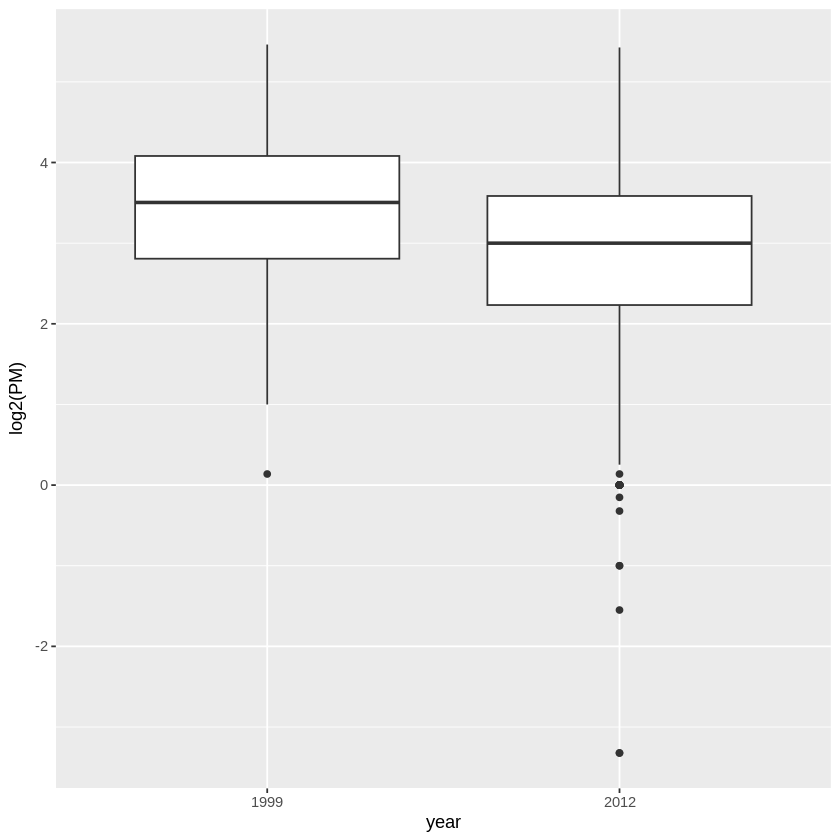

In [16]:
##Take a random sample

set.seed(2015)
idx <- sample(nrow(pm), 1000)
qplot(year, log2(PM), data = pm[idx, ], geom = "boxplot")

In [17]:
with(pm, tapply(PM, year, summary))

$`1999`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   0.00    7.20   11.50   13.74   17.90  157.10   13217 

$`2012`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
-10.000   4.200   7.908   9.289  12.000 893.700   53729 


In [18]:
filter(pm, year == "2012") %>% summarize(negative = mean(PM < 0, na.rm = TRUE))


negative
<dbl>
0.0212176


In [19]:
library(lubridate)


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [20]:
negative <- filter(pm, year == "2012") %>%
  mutate(negative = PM<0, date = ymd(Date)) %>%
  select(date, negative)

In [21]:
mutate(negative, month = factor(month.name[month(date)], levels = month.name)) %>%
  group_by(month) %>%
  summarize(pct.negative = mean(negative, na.rm = TRUE)*100)

month,pct.negative
<fct>,<dbl>
January,2.392243
February,2.257392
March,2.486666
April,2.188390
May,1.768784
June,2.733279
July,1.003734
August,1.361083
September,1.661770


###Changes in PM levels at an individual monitor

In [23]:
sites <- filter(pm, State.Code == 36) %>% select(County.Code, Site.ID, year) %>% unique

In [24]:
sites <- mutate(sites, site.code = paste(County.Code, Site.ID, sep = "."))
str(sites)

tibble [51 × 4] (S3: tbl_df/tbl/data.frame)
 $ County.Code: chr [1:51] "001" "001" "005" "005" ...
 $ Site.ID    : chr [1:51] "0005" "0012" "0073" "0080" ...
 $ year       : Factor w/ 2 levels "1999","2012": 1 1 1 1 1 1 1 1 1 1 ...
 $ site.code  : chr [1:51] "001.0005" "001.0012" "005.0073" "005.0080" ...


In [25]:
site.year <- with(sites, split(site.code, year))
both <- intersect(site.year[[1]], site.year[[2]])
print(both)

 [1] "001.0005" "001.0012" "005.0080" "013.0011" "029.0005" "031.0003"
 [7] "063.2008" "067.1015" "085.0055" "101.0003"


In [27]:
count <- mutate(pm, site.code = paste(County.Code, Site.ID, sep = ".")) %>%
  filter(site.code %in% both)

In [28]:
group_by(count, site.code) %>% summarize(n = n())

site.code,n
<chr>,<int>
001.0005,186
001.0012,92
005.0080,92
013.0011,213
029.0005,94
031.0003,198
063.2008,152
067.1015,153
085.0055,38


In [29]:
pmsub <- filter(pm, State.Code == "36" & County.Code == "063" & Site.ID == "2008") %>%
  select(Date, year, PM) %>%
  mutate(Date = ymd(Date), yday = yday(Date))

Now we plot the time series data of PM for the monitor in both years.

Warning message:
“Removed 35 rows containing missing values or values outside the scale range
(`geom_point()`).”


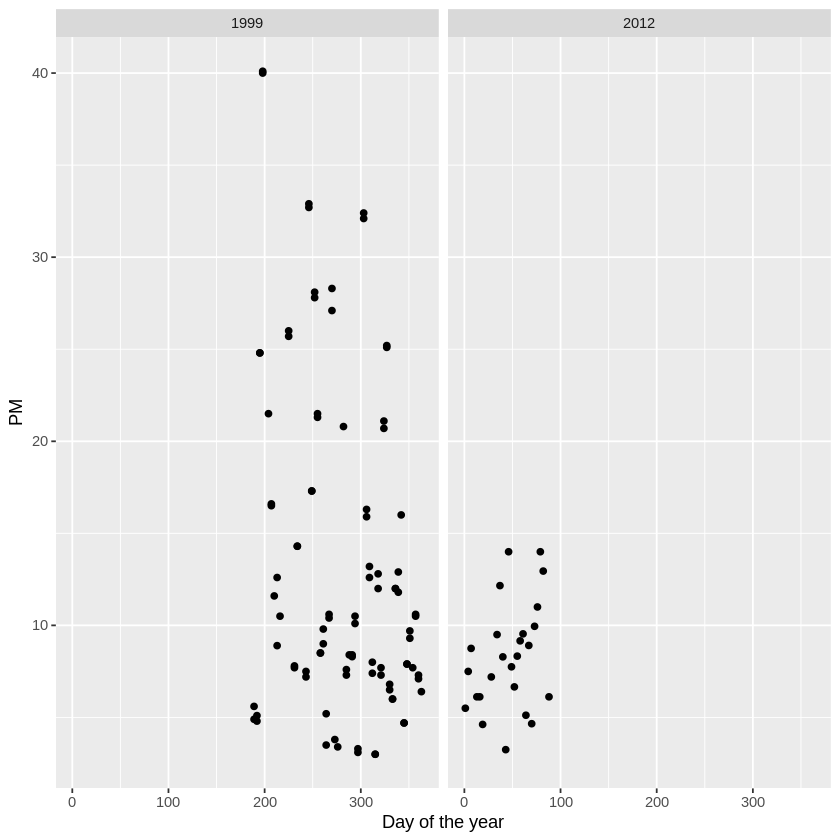

In [30]:
qplot(yday, PM, data = pmsub, facets = . ~ year, xlab = "Day of the year")

###Changes in state-wide PM levels

In [31]:
mn <- group_by(pm, year, State.Code) %>% summarize(PM = mean(PM, na.rm = TRUE))
head(mn)

`summarise()` has grouped output by 'year'. You can override using the
`.groups` argument.


year,State.Code,PM
<fct>,<chr>,<dbl>
1999,01,19.956391
1999,02,6.665929
1999,04,10.795547
1999,05,15.676067
1999,06,17.655412
1999,08,7.533304


In [32]:
tail(mn)

year,State.Code,PM
<fct>,<chr>,<dbl>
2012,37,9.568289
2012,38,6.654433
2012,39,11.771930
2012,40,10.849870
2012,41,7.373664
2012,42,10.632045


Now make a plot that shows the 1999 state-wide means in one “column” and the 2012 state-wide means in another columns. We then draw a line connecting the means for each year in the same state to highlight the trend.

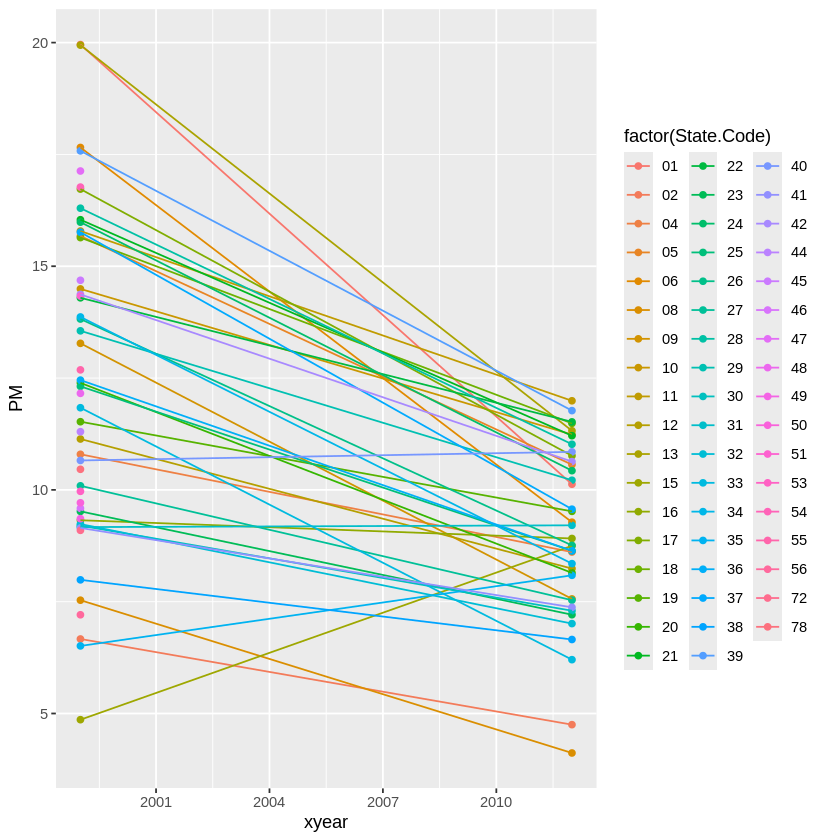

In [33]:
qplot(xyear, PM, data = mutate(mn, xyear = as.numeric(as.character(year))),
color = factor(State.Code),
geom = c("point","line"))

We can see that many states have decreased the average PM levels from 1999 to 2012 (although a few states actually increased their levels).